## **Analyzing the Growth of Indian Startups**

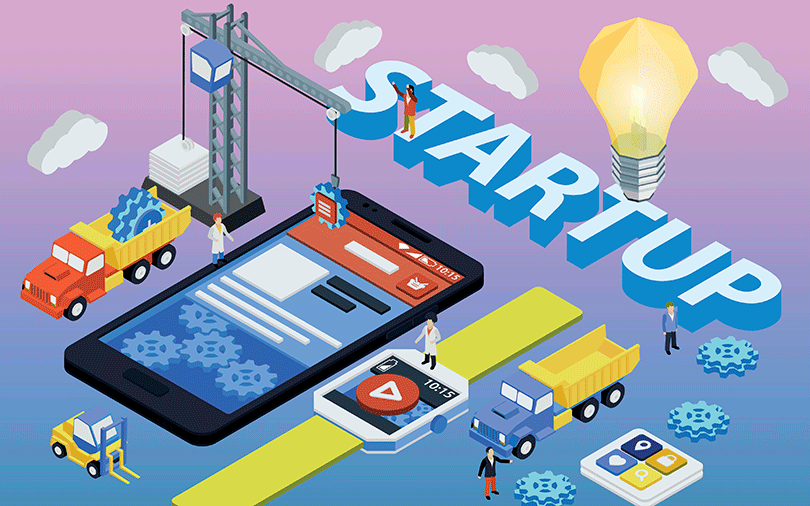

## Lets Install the Libraries

In [44]:
# install these libraries given below to run the program successfully, 
# if already installed ignore.
#pip install numpy
#pip install pandas
#pip seaborn
#pip matplotlib

In [45]:
# for mathematical operations
import numpy as np 

# for dataframe operations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# lets select  a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 7)

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the data

In [60]:
# lets import the data
data = pd.read_csv("/content/drive/MyDrive/30 projects/Startups-Case-study/EDA on Finance Data/startup_funding.csv")



In [61]:
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [62]:
# changing the names of the columns inside the data
data.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical",
                        "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]

# lets clean the strings
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

# lets apply the function to clean the data
for col in ["StartupName", "IndustryVertical", "SubVertical", "City", 
            "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
    data[col] = data[col].apply(lambda x: clean_string(x))
    
# lets check the head of the data
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [63]:
# lets check the column names of the data
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [64]:
# lets check the shape of the data
print("Size of data", data.shape)

Size of data (3044, 10)


## Data Cleaning

In [65]:
# missing data 

# lets import warnings module
import warnings
warnings.filterwarnings('ignore')

# lets calculate the total missing values in the data
total = data.isnull().sum().sort_values(ascending = False)

# lets calculate the percentage of missing values in the data
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)

# lets store the above two values in a dataset called missing data
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])

# lets check the head of the data
missing_data

,Total,Percent %
Remarks,0,0.0
AmountInUSD,0,0.0
InvestmentType,0,0.0
InvestorsName,0,0.0
City,0,0.0
SubVertical,0,0.0
IndustryVertical,0,0.0
StartupName,0,0.0
Date,0,0.0
SNo,0,0.0


In [66]:
data.isnull().sum()

SNo                 0
Date                0
StartupName         0
IndustryVertical    0
SubVertical         0
City                0
InvestorsName       0
InvestmentType      0
AmountInUSD         0
Remarks             0
dtype: int64

In [67]:
# lets check the values in the Remarks column
data['Remarks'].value_counts()

nan                                       2625
Series A                                   177
Series B                                    64
Pre-Series A                                37
Series C                                    28
                                          ... 
Govt backed VC Fund                          1
late Stage (part of $500M funding rnd)       1
QPrize Contest Winners                       1
For mobile app                               1
pre series A                                 1
Name: Remarks, Length: 70, dtype: int64

In [68]:
# lets remove Remarks column, as it contains a lot of nans, and high cardinal column

data = data.drop(['Remarks'], axis = 1)

# lets check the column names after removing the Remarks Column, as it having 
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

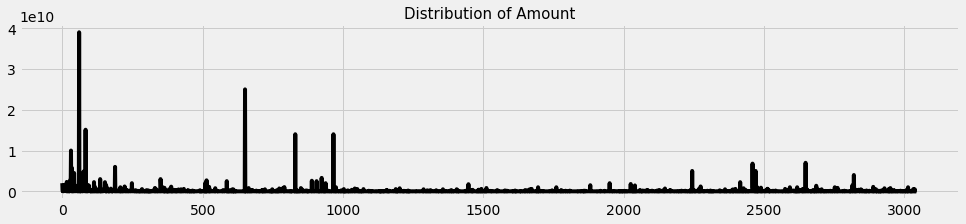

In [70]:
# lets convert the amount column into numerical, so that we can analyze the values inside it

# function to clean the AmountInUSD Column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

# lets apply the function on the column
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x: float(clean_amount(x)))

# lets check the head of the column after cleaning it
plt.rcParams['figure.figsize'] = (15, 3)
data['AmountInUSD'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

In [80]:
data['Date']

0       09/01/2020
1       13/01/2020
2       09/01/2020
3       02/01/2020
4       02/01/2020
           ...    
3039    29/01/2015
3040    29/01/2015
3041    30/01/2015
3042    30/01/2015
3043    31/01/2015
Name: Date, Length: 3044, dtype: object

In [81]:
## Cleaning the dates

data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

## How Does the Funding Ecosystem changes with respect to Time?

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


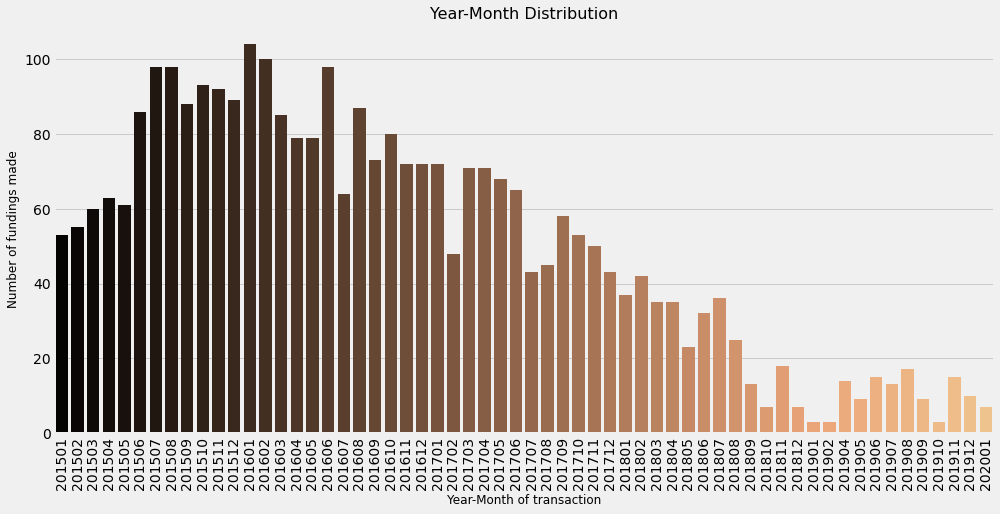

In [17]:
# some of the date formats are written wrongly so we have to clean them thoroughly so that we can analyze these values

# converting them into a Datetime object
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

## What is the General Amount that Startups get in India?

In [82]:
# lets check the Maximum funding of a startup
print("Maximum funding to a Startups is : ", data["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  39000000000.0


In [83]:
# lets check the startups with more than 50crore+ funding

@interact
def check(column = 'AmountInUSD', x = 500000000): # 50 crore funding of startups
    return data[data[column] > x].sort_values(by = 'AmountInUSD', ascending = False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [84]:
# lets check out different ventures of Paytm
data[data.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+10
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+07
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+10
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+08
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+09
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,9.990000e+03
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,9.990000e+03


In [85]:
# lets check out different ventures of Flipkart
data[data.StartupName == 'Flipkart']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+10
773,774,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+08
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+10
1032,1033,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+08
2689,2690,04/06/2015,Flipkart,eCommerce platform,nan,Bangalore,Morgan Stanley,Private Equity,5.000000e+08


In [86]:
# lets check the minimum funding in a startup
print("Minimum funding to a Startups is : ", data["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  9990.0


In [87]:
# lets check the startups with least funding
data[['AmountInUSD','StartupName']].sort_values(by = 'AmountInUSD', ascending = True).head(5)

,AmountInUSD,StartupName
2125,9990.0,Splitkart
1464,9990.0,TAC Security
708,9990.0,FableStreet
709,9990.0,Monsoon Fintech
710,9990.0,MonkeyBox


In [88]:
data[data['AmountInUSD'] == -999.0].shape

(0, 9)

In [89]:
# Average Funding
print("On Average indian startups got funding of : ", data["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  132706955.99540079


In [91]:
# lets check the no. of funding each startsup got

print("Total startups funded : ", len(data["StartupName"].unique()))
print(data["StartupName"].value_counts().head(10))
startupname = data['StartupName'].value_counts().head(20)



Total startups funded :  2457
Ola Cabs     8
Swiggy       8
Paytm        7
Meesho       6
UrbanClap    6
Medinfi      6
Nykaa        6
NoBroker     6
Jugnoo       5
Toppr        5
Name: StartupName, dtype: int64


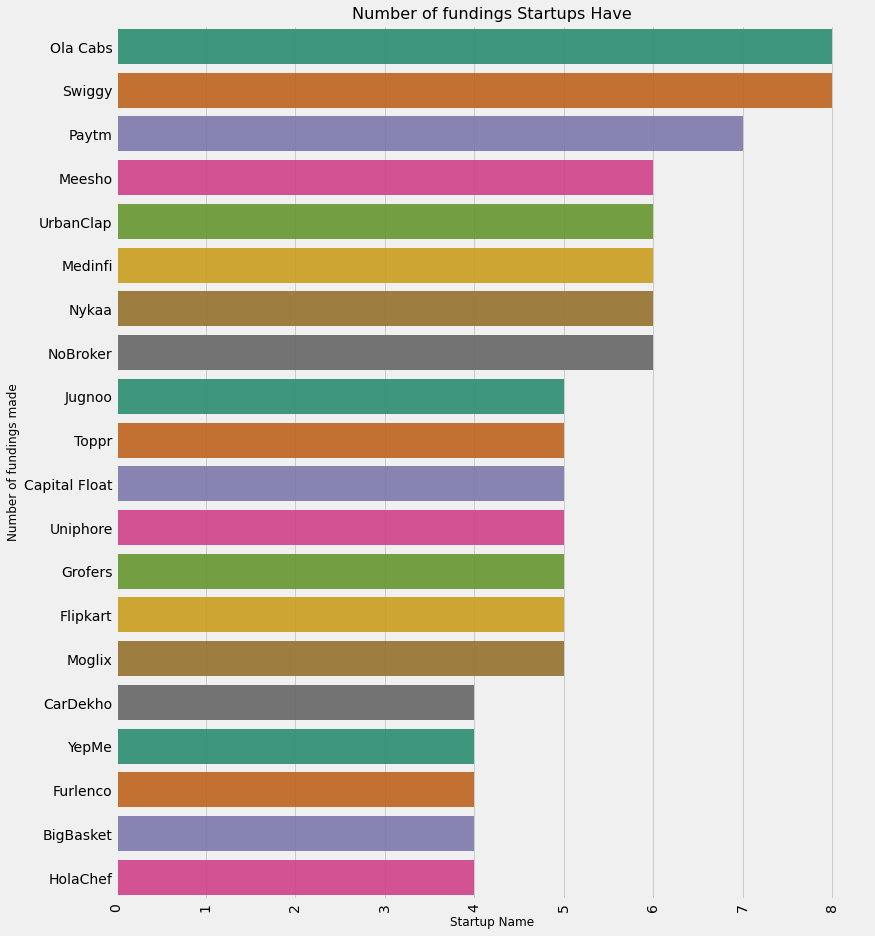

In [92]:
# lets plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

## Which Kind of Industries are more preferred for Startups?

In [93]:
# lets analyze the Industry of the Startups

# data cleaning
data['IndustryVertical'] = data['IndustryVertical'].replace('nan', 'Consumer Technology')

industry = data['IndustryVertical'].value_counts().head(10)
print(industry)



Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


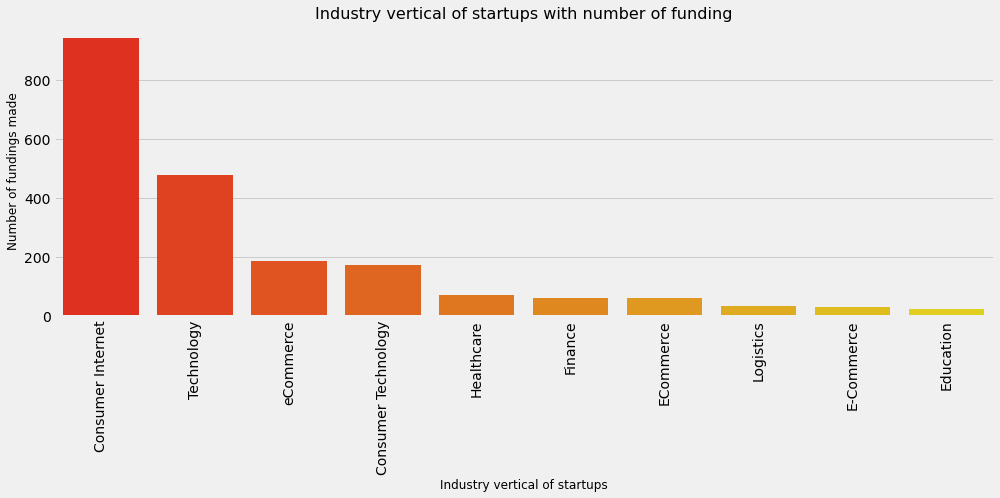

In [94]:
# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

In [97]:
# lets analyze the sub vertical industries

industry = data['SubVertical'].value_counts()[1:].head(20)
print(industry)

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online Learning Platform                          5
Online lending platform                           5
Online Education Platform                         5
Education                                         5
Online Lending                                    5
Online Food Delivery                              4
Non-Banking Financial Company                     4
Data Analytics platform                           3
Fitness Mobile App                                3
Online Marketplace                                3
E-learning                                        3
Logistics                                         3
SaaS                                              3
ECommerce Marketplace                             3
Online platform for Higher Education Services     3
Online Payment Gateway                            3
Online Insur

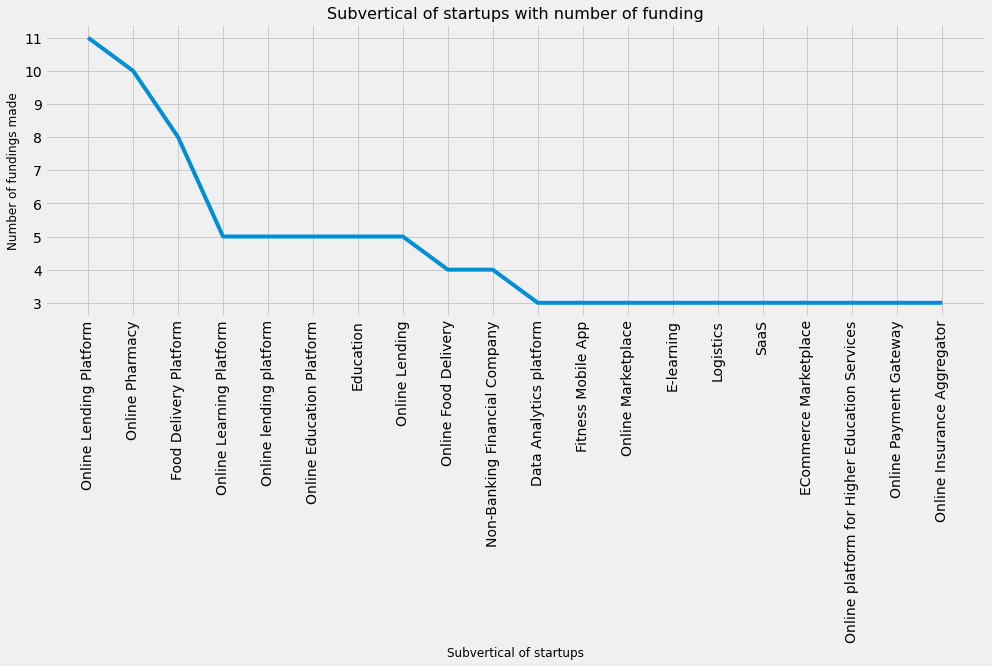

In [96]:
# lets plot the data
sns.lineplot(industry.index, industry.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

## Does Location also play a role, In determining the Growth of a Startup?

In [98]:
# analyzing the effect of Cities on a Startup

# lets clean the data for better analysis
data['City'] = data['City'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))



In [99]:
city = data['City'].value_counts().head(10)
print(city)



Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: City, dtype: int64


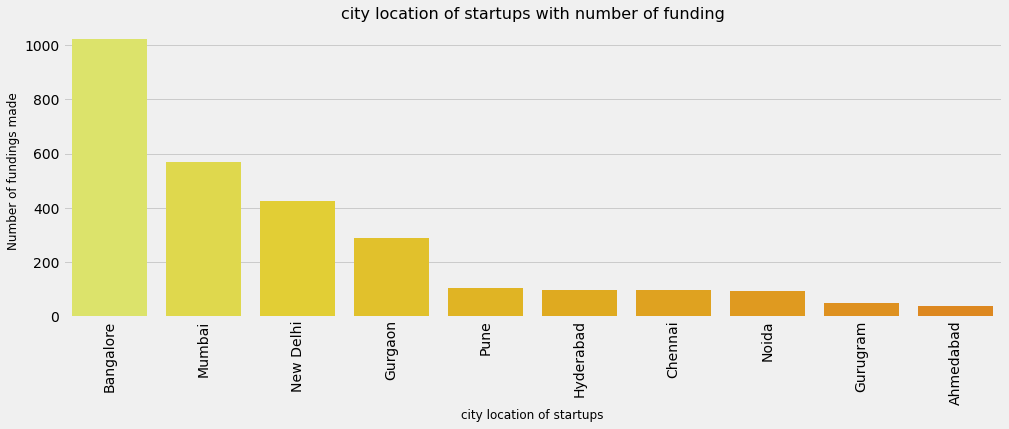

In [100]:
# lets plot the data
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

## Who plays the main role in Indian Startups Ecosystem?

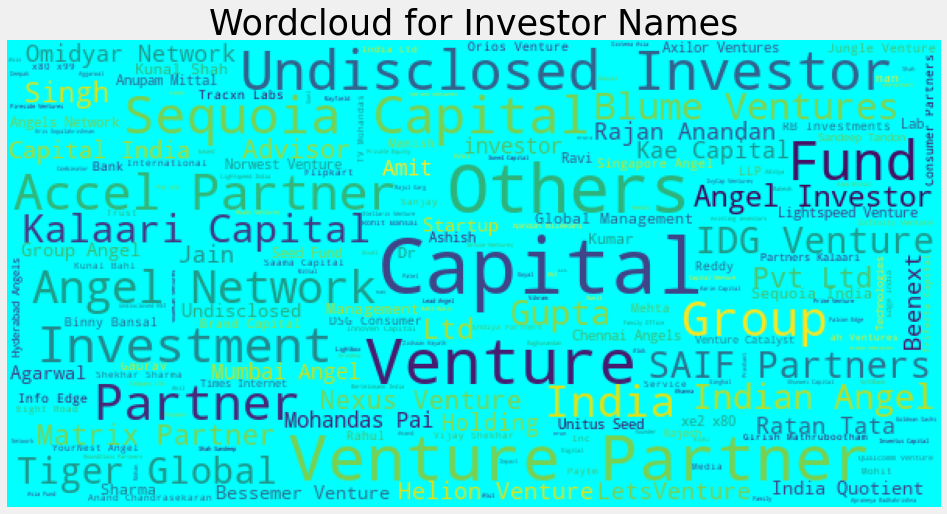

In [101]:
from wordcloud import WordCloud

names = data["InvestorsName"][~pd.isnull(data["InvestorsName"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

In [102]:
# lets analyze the investors on startups

# lets clean the dataset
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'nan'] = 'Undisclosed Investors'



In [103]:
# lets check the value counts
investors = data['InvestorsName'].value_counts().head(10)
print(investors)



Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
SAIF Partners                10
Name: InvestorsName, dtype: int64


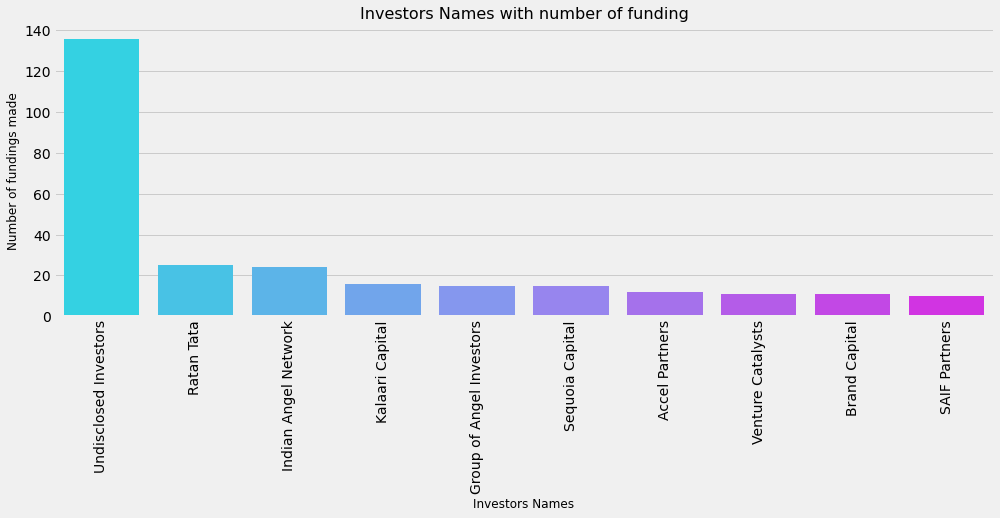

In [104]:
# lets plot the data
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

## What are the different Types of Funding for Startups?

In [105]:
# lets analyze the investment
investment = data['InvestmentType'].value_counts().head(10)
print(investment)



Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64


In [106]:
# lets clean the dataset
data['InvestmentType'][data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'



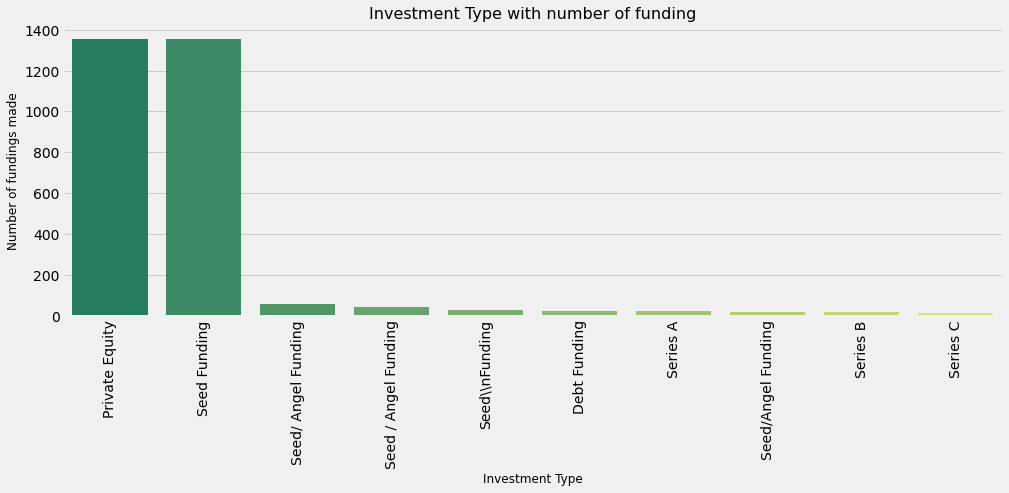

In [107]:
# lets plot the data
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()